In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import prospect
import seaborn as sns
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from prospect.plotting import bb_plot
from scipy.stats import beta

In [3]:
sns.set_style("white")
sns.set_context("notebook")

pd.options.display.float_format = "{:,.2f}".format

In [4]:
area = prospect.Area.from_shapefile(
    name="Area", 
    path="./data/demo_area.shp",
    vis=beta(8, 2)
)

<AxesSubplot:>

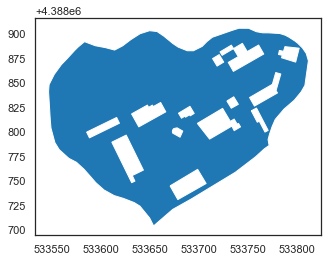

In [5]:
area.df.plot()

In [6]:
coverage = prospect.Coverage.from_transects(
    name="Coverage", 
    area=area,
    spacing=15.0,
    sweep_width=3.0,
    orientation=0.0,
    optimize_orient_by="area_orient",
    orient_increment=5.0,
    orient_axis='long',
    min_time_per_unit=4.0,
)

<AxesSubplot:>

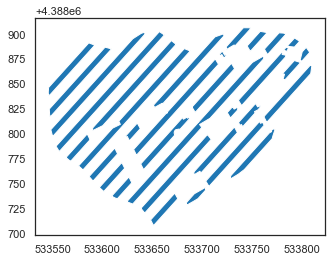

In [7]:
coverage.df.plot()

In [8]:
layer_shp = prospect.Layer.from_shapefile(
    path="./data/demo_layer.shp",
    name="Layer-shp",
    area=area,
    time_penalty=60,
    ideal_obs_rate=1.0,
)

layer_poisson = prospect.Layer.from_matern_points(
    parent_rate=0.00017,
    child_rate=12,
    radius=10,
    name="Layer-Poisson", 
    area=area, 
    time_penalty=60,
    ideal_obs_rate=beta(9, 1)
)


In [9]:
assemblage = prospect.Assemblage(
    name="Assemblage",
    layer_list=[layer_shp, layer_poisson]
)

<AxesSubplot:>

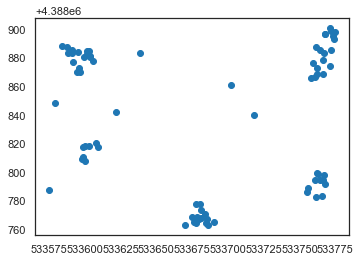

In [10]:
assemblage.df.plot()

In [11]:
assemblage.df

,feature_name,layer_name,shape,time_penalty,ideal_obs_rate
0,Layer-shp_0,Layer-shp,POINT (533579.123 4388848.757),60,1.0
1,Layer-shp_1,Layer-shp,POINT (533638.844 4388883.594),60,1.0
2,Layer-shp_2,Layer-shp,POINT (533621.702 4388842.121),60,1.0
3,Layer-shp_3,Layer-shp,POINT (533701.882 4388861.475),60,1.0
4,Layer-shp_4,Layer-shp,POINT (533669.810 4388763.047),60,1.0
...,...,...,...,...,...
71,Layer-Poisson_84,Layer-Poisson,POINT (533680.923 4388774.056),60,<scipy.stats._distn_infrastructure.rv_frozen o...
72,Layer-Poisson_85,Layer-Poisson,POINT (533674.741 4388769.067),60,<scipy.stats._distn_infrastructure.rv_frozen o...
73,Layer-Poisson_86,Layer-Poisson,POINT (533681.301 4388768.029),60,<scipy.stats._distn_infrastructure.rv_frozen o...
74,Layer-Poisson_87,Layer-Poisson,POINT (533678.443 4388769.203),60,<scipy.stats._distn_infrastructure.rv_frozen o...


In [12]:
surveyor = prospect.Surveyor(
    name="Surveyor", 
    team_name="Team", 
    surveyor_type="default",
    skill=beta(9, 1),
    speed_penalty=0.0
)

team = prospect.Team(
    name="Team",
    surveyor_list=[surveyor],
    assignment="naive"
)

In [13]:
team.df

,surveyor_name,team_name,surveyor_type,skill,speed_penalty
0,Surveyor,Team,default,<scipy.stats._distn_infrastructure.rv_frozen o...,0.00


In [14]:
survey = prospect.Survey(name="Survey", area=area, assemblage=assemblage, coverage=coverage, team=team)

In [15]:
survey.run(n_runs=1)

In [16]:
survey.time_surveyunit.fillna("-")

,run,surveyunit_name,surveyor_name,base_search_time,sum_time_penalty_obs,speed_penalty_obs,total_time_per_surveyunit
0,0,Coverage_0,Surveyor,260.91,120,0.00,380.91
1,0,Coverage_1,Surveyor,352.30,480,0.00,832.30
2,0,Coverage_10,Surveyor,736.92,360,0.00,"1,096.92"
3,0,Coverage_13,Surveyor,244.12,240,0.00,484.12
4,0,Coverage_4,Surveyor,590.99,360,0.00,950.99
5,0,Coverage_7,Surveyor,737.56,60,0.00,797.56
6,0,Coverage_9,Surveyor,877.88,360,0.00,"1,237.88"


In [17]:
survey.discovery.sample(n=15).sort_index().fillna("-")

,run,feature_name,shape,obs_rate,vis_obs,proximity_obs,skill_obs,discovery_prob
2,0,Layer-shp_2,POINT (533621.702 4388842.121),1.00,0.75,0.00,-,-
3,0,Layer-shp_3,POINT (533701.882 4388861.475),1.00,0.85,1.00,0.95,0.81
6,0,Layer-shp_6,POINT (533771.556 4388874.194),1.00,0.55,0.00,-,-
8,0,Layer-Poisson_0,POINT (533760.681 4388866.991),0.96,0.77,0.00,-,-
17,0,Layer-Poisson_14,POINT (533761.087 4388794.668),0.98,0.75,0.00,-,-
32,0,Layer-Poisson_30,POINT (533767.609 4388896.533),0.88,0.59,0.00,-,-
34,0,Layer-Poisson_32,POINT (533774.331 4388893.431),0.81,0.90,1.00,0.89,0.65
35,0,Layer-Poisson_33,POINT (533774.815 4388898.131),0.85,0.95,1.00,0.96,0.77
37,0,Layer-Poisson_35,POINT (533606.083 4388877.814),0.90,0.75,0.00,-,-
42,0,Layer-Poisson_40,POINT (533596.610 4388870.346),0.93,0.95,0.00,-,-


In [18]:
AREA_LT_BLUE = "#a6cee3"
COVERAGE_BLUE = "#1f78b4"
LAYER_GREEN = {"facecolor": "#33a02c", "edgecolor": "#b2df8a"}
LAYER_ORANGE = {"facecolor": "#ff7f00", "edgecolor": "#fdbf6f"}

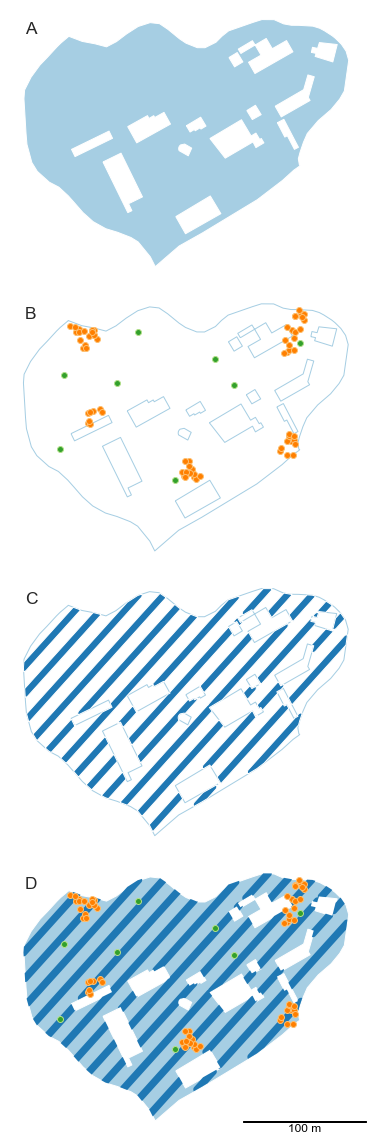

In [33]:
# Color scheme based on ColorBrewer2.org qualitative "8-class Paired"

fig, ax = plt.subplots(4, 1, figsize=(8, 16))

# Area
# ax[0].set_title("Area", size="x-large", pad=0)
ax[0].text(x=0.05, y=0.90, s="A", size="x-large", transform=ax[0].transAxes)
area.df.plot(ax=ax[0], color="#a6cee3")

# Assemblage
# ax[1].set_title("Assemblage", size="x-large", pad=0)
ax[1].text(x=0.05, y=0.90, s="B", size="x-large", transform=ax[1].transAxes)
area.df.plot(ax=ax[1], facecolor="none", edgecolor="#a6cee3")
shp_pts = assemblage.df.loc[assemblage.df["layer_name"] != "Layer-Poisson"]
poisson_pts = assemblage.df.loc[assemblage.df["layer_name"] == "Layer-Poisson"]
shp_pts.plot(ax=ax[1], facecolor=LAYER_GREEN["facecolor"], edgecolor=LAYER_GREEN["edgecolor"])
poisson_pts.plot(ax=ax[1], facecolor=LAYER_ORANGE["facecolor"], edgecolor=LAYER_ORANGE["edgecolor"])


# Coverage
# ax[2].set_title("Coverage", size="x-large", pad=0)
ax[2].text(x=0.05, y=0.90, s="C", size="x-large", transform=ax[2].transAxes)
area.df.plot(ax=ax[2], facecolor="none", edgecolor="#a6cee3")
coverage.df.plot(ax=ax[2], color="#1f78b4")

# Combined
# ax[3].set_title("Combined", size="x-large", pad=0)
ax[3].text(x=0.05, y=0.90, s="D", size="x-large", transform=ax[3].transAxes)
area.df.plot(ax=ax[3], color="#a6cee3")
coverage.df.plot(ax=ax[3], facecolor="#1f78b4", edgecolor="none")
shp_pts.plot(ax=ax[3], facecolor=LAYER_GREEN["facecolor"], edgecolor=LAYER_GREEN["edgecolor"])
poisson_pts.plot(ax=ax[3], facecolor=LAYER_ORANGE["facecolor"], edgecolor=LAYER_ORANGE["edgecolor"])

scalebar = AnchoredSizeBar(
    ax[3].transData,
    100, 
    "100 m", 
    "lower right", 
    pad=-0.2,
    color="black",
    frameon=False,
    size_vertical=1)
ax[3].add_artist(scalebar)

for sub_ax in fig.axes:
    sub_ax.axis("off")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("./building_blocks_v4.png", dpi=300)

## Plot the discovered and undiscovered artifacts together

In [34]:
discovered_artifacts = survey.discovery.loc[survey.discovery["discovery_prob"].notna()]
discovered_artifacts["layer_name"] = discovered_artifacts["feature_name"].str.split("_").apply(lambda x: x[0])
undiscovered_artifacts = survey.discovery.loc[survey.discovery["discovery_prob"].isna()]
undiscovered_artifacts["layer_name"] = undiscovered_artifacts["feature_name"].str.split("_").apply(lambda x: x[0])

/Users/jdeppen/miniconda3/envs/prospect/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [35]:
print(f"{discovered_artifacts.shape[0]:02} discovered artifacts")
print(f"{undiscovered_artifacts.shape[0]:02} undiscovered artifacts")

33 discovered artifacts
43 undiscovered artifacts


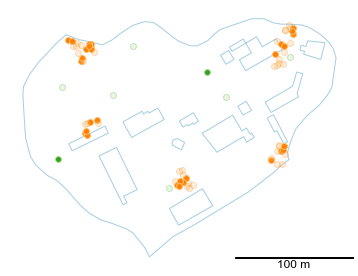

In [36]:
fig, ax = plt.subplots()
area.df.plot(ax=ax, facecolor="none", edgecolor="#a6cee3")

# plot discovered artifacts
shp_pts = discovered_artifacts.loc[discovered_artifacts["layer_name"] != "Layer-Poisson"]
poisson_pts = discovered_artifacts.loc[discovered_artifacts["layer_name"] == "Layer-Poisson"]
shp_pts.plot(ax=ax, facecolor=LAYER_GREEN["facecolor"], edgecolor=LAYER_GREEN["edgecolor"])
poisson_pts.plot(ax=ax, facecolor=LAYER_ORANGE["facecolor"], edgecolor=LAYER_ORANGE["edgecolor"])
# plot undiscovered artifacts
un_shp_pts = undiscovered_artifacts.loc[undiscovered_artifacts["layer_name"] != "Layer-Poisson"]
un_poisson_pts = undiscovered_artifacts.loc[undiscovered_artifacts["layer_name"] == "Layer-Poisson"]
un_shp_pts.plot(ax=ax, facecolor="#b2df8a", edgecolor="#33a02c", alpha=0.25)
un_poisson_pts.plot(ax=ax, facecolor="#fdbf6f", edgecolor="#ff7f00", alpha=0.25)

scalebar = AnchoredSizeBar(
    ax.transData,
    100, 
    "100 m", 
    "lower right", 
    pad=-0.2,
    color="black",
    frameon=False,
    size_vertical=1)
ax.add_artist(scalebar)


# styling
ax.axis("off")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("./example_discovered.png", dpi=300)